In [47]:
import pandas as pd
import numpy as np
import re

### Create doc to vector

In [48]:
columns_movies = ["movie_id", "title", "imdb_idx",
                  "movie_kind", "release", "imdb_id", "phonetic", "episode_id",
                  "season", "episode", "series_years", "md5"]

df_IMDb_movies = pd.read_csv('data/title.csv', delimiter=',', names=columns_movies, encoding = "ISO-8859-1", low_memory=False) 
df_IMDb_movies = df_IMDb_movies.drop(columns=["imdb_idx", "imdb_id", "phonetic", "md5", "episode_id", "episode", "movie_kind", "season", "series_years"])
df_IMDb_movies = df_IMDb_movies.dropna(subset=['release'])
df_IMDb_movies["release"] = df_IMDb_movies["release"].apply(lambda x : str(int(x)).split("-")[-1])
# we lowered in MovieLens as well
df_IMDb_movies = df_IMDb_movies.dropna(subset=["title"])
df_IMDb_movies["title"] = df_IMDb_movies["title"].apply(lambda x: x.lower())

# drop rows where movie starts with brackets, those are some strange names...
df_IMDb_movies = df_IMDb_movies[~df_IMDb_movies.title.str.startswith("(")]

# handle seven (se7en) movies, creating new rows containing the content of brackets
_df = df_IMDb_movies[df_IMDb_movies.title.str.contains("(", regex=False)]
_df.title = _df.title.apply(lambda x: re.search(r'\((.*?)\)', x).group(1).strip() if re.search(r'\((.*?)\)', x) else x.strip())
df_IMDb_movies = df_IMDb_movies.append(_df)

print(df_IMDb_movies.dtypes)
print(df_IMDb_movies.shape)
df_IMDb_movies.head()

/Users/dias/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


movie_id     int64
title       object
release     object
dtype: object
(1776458, 3)


,movie_id,title,release
1,5156,josie duggar's 1st shoes,2010
5,40704,anniversary,1971
7,149337,mellody hobson,2005
8,32020,kiss me kate,2011
10,112085,the best of olivia,2008


In [49]:
def clean_movie_title(movie_title):
    if movie_title.split(" ")[-1].startswith("("):
        # remove year from the title, e.g. Toy Story (1995) --> Toy Story
        movie_title = (" ".join(movie_title.split(" ")[:-1])).strip()

    if movie_title.title().split(',')[-1].strip() in ['The', 'A']:
        # article + movie title, e.g. Saint, The --> The Saint
        movie_title = (movie_title.title().split(',')[-1].strip() + " " + " ".join(movie_title.title().split(',')[:-1])).strip()

    # otherwise, it was converting The Devil's Advocate to The Devil'S Advocate
    movie_title = movie_title.lower()
    return movie_title

In [50]:
column_item = ["movie_id_ml", "title", "release", "vrelease", "url", "unknown", 
                    "action", "adventure", "animation", "childrens", "comedy",
                   "crime", "documentary", "drama", "fantasy", "noir", "horror",
                   "musical", "mystery", "romance", "scifi", "thriller",
                   "war", "western"]

df_ML_movies = pd.read_csv('data/u.item', delimiter='|', names=column_item, encoding = "ISO-8859-1") 
df_ML_movies = df_ML_movies.drop(columns=["vrelease"])
df_ML_movies["title"] = df_ML_movies["title"].apply(lambda row : clean_movie_title(row))   
df_ML_movies["release"] = df_ML_movies["release"].apply(lambda x : str(x).split("-")[-1])

# drop rows where movie starts with brackets, those are some strange names...
df_ML_movies = df_ML_movies[~df_ML_movies.title.str.startswith("(")]

# handle seven (se7en) movies, creating new rows containing the content of brackets
_df = df_ML_movies[df_ML_movies.title.str.contains("(", regex=False)]
_df.title = _df.title.apply(lambda x: re.search(r'\((.*?)\)', x).group(1).strip() if re.search(r'\((.*?)\)', x) else x.strip())
df_ML_movies = df_ML_movies.append(_df)

print(df_ML_movies.shape)
print(df_ML_movies.dtypes)
df_ML_movies.head()

(1767, 23)
movie_id_ml     int64
title          object
release        object
url            object
unknown         int64
action          int64
adventure       int64
animation       int64
childrens       int64
comedy          int64
crime           int64
documentary     int64
drama           int64
fantasy         int64
noir            int64
horror          int64
musical         int64
mystery         int64
romance         int64
scifi           int64
thriller        int64
war             int64
western         int64
dtype: object


/Users/dias/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,movie_id_ml,title,release,url,unknown,action,adventure,animation,childrens,comedy,...,fantasy,noir,horror,musical,mystery,romance,scifi,thriller,war,western
0,1,toy story,1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,goldeneye,1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,four rooms,1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,get shorty,1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,copycat,1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
df = pd.merge(df_ML_movies, df_IMDb_movies, on=["title", "release"])
movie_ids = list(df.movie_id_ml.unique())

In [76]:
movie_dim = max(list(df_ML_movies.movie_id_ml.unique()))
movie_dim

1682

### Create keyword to vector

In [77]:
column_movie_keyword = ["mkid", "movie_id", "keyword_id"]

df_movie_keyword = pd.read_csv('data/movie_keyword.csv', delimiter=',', names=column_movie_keyword, encoding = "ISO-8859-1") 
print(df_movie_keyword.dtypes)
print(df_movie_keyword.shape)
df_movie_keyword = df_movie_keyword.drop(columns=["mkid"])
df_movie_keyword.head()

mkid          int64
movie_id      int64
keyword_id    int64
dtype: object
(4523930, 3)


,movie_id,keyword_id
0,2,1
1,11,2
2,22,2
3,44,3
4,24,2


In [78]:
df_movies_keywords = pd.merge(df, df_movie_keyword, on="movie_id")
df_movies_keywords = df_movies_keywords[["movie_id_ml","keyword_id"]]
df_movies_keywords.head()

,movie_id_ml,keyword_id
0,1,834
1,1,2956
2,1,66752
3,1,93318
4,1,73783


In [79]:
column_keyword = ["keyword_id", "keyword", "phonetic"]

df_keyword = pd.read_csv('data/keyword.csv', delimiter=',', names=column_keyword, encoding = "ISO-8859-1") 
print(df_keyword.dtypes)
print(df_keyword.shape)
df_keyword = df_keyword.drop(columns=["phonetic"])
df_keyword.head()

keyword_id     int64
keyword       object
phonetic      object
dtype: object
(134170, 3)


,keyword_id,keyword
0,2068,handcuffed-to-a-bed
1,157,jane-austen
2,8309,narcotic
3,1059,woods
4,3991,hanging


In [80]:
np_movies_keywords = df_movies_keywords.to_numpy()
np_movies_keywords

array([[    1,   834],
       [    1,  2956],
       [    1, 66752],
       ...,
       [ 1575,  2242],
       [ 1575, 11548],
       [ 1635,     1]])

In [81]:
keyword_vector = np.zeros((movie_dim, df_keyword.shape[0]))

for i in range(np_movies_keywords.shape[0]) :
    row = np_movies_keywords[i,0]-1
    column = np_movies_keywords[i,1]-1
    keyword_vector[row, column] = 1
        

In [82]:
useful_keywords = []

for i in range(keyword_vector.shape[1]) :
    cnt = keyword_vector[:,i].sum()
    if cnt > 1 :
        useful_keywords += [i]
        
print(len(useful_keywords))
keyword_vector = keyword_vector[:,useful_keywords]
print(keyword_vector.shape)
print(keyword_vector.sum())

10243
(1682, 10243)
89924.0


### Create cast vector

In [83]:
columns_roles = ["role_id", "cast_role"]

df_roles = pd.read_csv('data/role_type.csv', delimiter=',', names=columns_roles, encoding = "ISO-8859-1") 
print(df_roles.dtypes)
print(df_roles.shape)
df_roles.head()

role_id       int64
cast_role    object
dtype: object
(12, 2)


,role_id,cast_role
0,1,actor
1,2,actress
2,3,producer
3,4,writer
4,5,cinematographer


In [84]:
column_cast = ["cast_id", "person_id", "movie_id", "person_role_id", "note", "nr_order", "role_id"]

df_cast = pd.read_csv('data/cast_info.csv', delimiter=',', names=column_cast, encoding = "ISO-8859-1", low_memory=False) 
df_cast['role_id'] = pd.to_numeric(df_cast['role_id'], errors='coerce')
df_cast = df_cast.drop(columns=["note", "nr_order", "person_role_id"])

print(df_cast.dtypes)
print(df_cast.shape)
df_cast.head()

cast_id        int64
person_id      int64
movie_id       int64
role_id      float64
dtype: object
(36243322, 4)


,cast_id,person_id,movie_id,role_id
0,1,1,968504,1.0
1,2,2,2163857,1.0
2,3,2,2324528,1.0
3,4,3,1851347,1.0
4,5,4,1681365,1.0


In [85]:
column_people = ["person_id", "cast_name", "imdb_idx", "imdb_id", "cast_gender", "name_cf", "name_nf", "surname", "md5"]

df_people = pd.read_csv('data/name.csv', delimiter=',', names=column_people, encoding = "ISO-8859-1", low_memory=False) 

print(df_people.dtypes)
print(df_people.shape)
df_people = df_people.drop(columns=["imdb_idx", "imdb_id", "md5", "name_cf", "name_nf", "surname"])
df_people.head()

person_id        int64
cast_name       object
imdb_idx        object
imdb_id        float64
cast_gender     object
name_cf         object
name_nf         object
surname         object
md5             object
dtype: object
(4167491, 9)


,person_id,cast_name,cast_gender
0,3343,"Abela, Mike",m
1,446,"A., David",m
2,126,"-Alverio, Esteban Rodriguez",m
3,1678,"Abbas, Athar",m
4,3610,"Aberer, Leo",m


In [86]:
df_cast_ml = pd.merge(df, df_cast, on="movie_id")
df_cast_ml = pd.merge(df_cast_ml, df_roles, on="role_id")
df_cast_ml = df_cast_ml[["movie_id_ml","person_id","cast_role"]]
df_cast_ml.head()

,movie_id_ml,person_id,cast_role
0,1,30260,actor
1,1,46332,actor
2,1,46332,actor
3,1,66226,actor
4,1,128339,actor


In [87]:
np_cast = df_cast_ml.to_numpy()

In [88]:
cast_vector = np.zeros((movie_dim, df_people.shape[0]))

for i in range(np_cast.shape[0]) :
    row = np_cast[i,0]-1
    column = np_cast[i,1]-1
    cast_vector[row, column] = 1
        

In [89]:
useful_cast = []

for i in range(cast_vector.shape[1]) :
    cnt = cast_vector[:,i].sum()
    if cnt > 1 :
        useful_cast += [i]
        
print(len(useful_cast))
cast_vector = cast_vector[:,useful_cast]
print(cast_vector.shape)
print(cast_vector.sum())

19932
(1682, 19932)
64946.0


In [90]:
### Creating the total vector

In [91]:
movie_vec = np.concatenate((keyword_vector, cast_vector), axis=1)
movie_vec.shape

(1682, 30175)

In [92]:
genres = ["movie_id_ml", "unknown", "action", "adventure", "animation", "childrens", "comedy",
                   "crime", "documentary", "drama", "fantasy", "noir", "horror",
                   "musical", "mystery", "romance", "scifi", "thriller",
                   "war", "western"]

df_genres = df_ML_movies[genres]

In [93]:
np_genres = df_genres.to_numpy()

In [94]:
np_genres.shape

(1767, 20)

In [95]:
genre_vector = np.zeros((movie_dim, 19))

for i in range(np_genres.shape[0]) :
    row = np_genres[i,0]-1
    genre_vector[row,:] += np_genres[i,1:]
    
genre_vector = (genre_vector > 0).astype(int)

In [96]:
genre_vector.shape

(1682, 19)

In [97]:
movie_vec = np.concatenate((movie_vec, genre_vector), axis=1)
movie_vec.shape

(1682, 30194)

### Computing cosine similarity

In [98]:
movie_vec_norm = np.zeros(movie_vec.shape)

for i in range(movie_vec_norm.shape[0]) :
    local_norm = np.linalg.norm(movie_vec[i,:])
    if local_norm > 0:
        movie_vec_norm[i,:] = movie_vec[i,:]/local_norm

In [99]:
movie_dist_cosine = np.zeros((movie_vec.shape[0], movie_vec.shape[0]))

for i in range(movie_vec_norm.shape[0]) :
    for j in range(movie_vec_norm.shape[0]) :
        if i < j :
            dist = movie_vec_norm[i,:].dot(movie_vec_norm[j,:])
            movie_dist_cosine[i,j] = dist
            movie_dist_cosine[j,i] = dist

In [100]:
np.save("cosine.dat", movie_dist_cosine)

In [101]:
threshold1 = 0.01
threshold2 = 0.01
threshold3 = 0.05
threshold4 = 0.1

movie_graph1 = (movie_dist_cosine > threshold1).astype(int)
movie_graph2 = (movie_dist_cosine > threshold2).astype(int)
movie_graph3 = (movie_dist_cosine > threshold3).astype(int)
movie_graph4 = (movie_dist_cosine > threshold4).astype(int)

In [102]:
from matplotlib import pyplot as plt

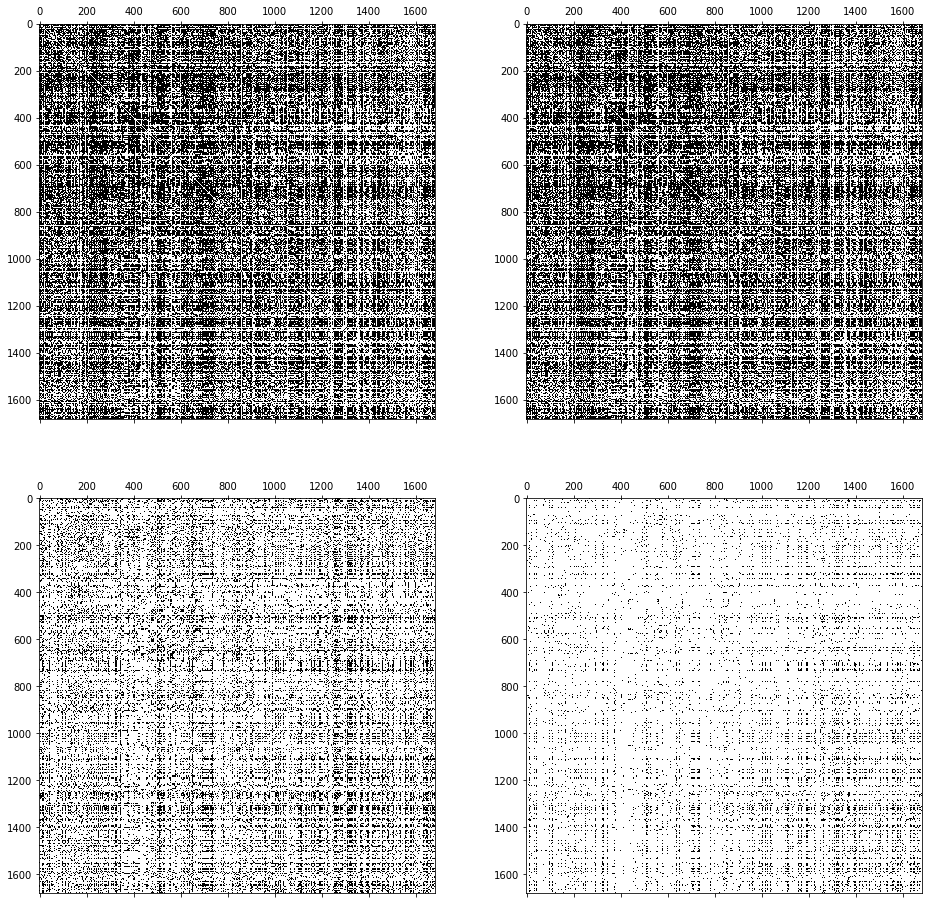

In [103]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes[0, 0].spy(movie_graph1);
axes[0, 1].spy(movie_graph2);
axes[1, 0].spy(movie_graph3);
axes[1, 1].spy(movie_graph4);

### Spectral analysis

In [105]:
def compute_laplacian(adjacency: np.ndarray, normalize: bool):
    """ Return:
        L (n x n ndarray): combinatorial or symmetric normalized Laplacian.
    """
    # Your code here
    n = adjacency.shape[0]
    
    # D is degree matrix (in our case the degree is represented with the weight of edge)
    D = np.diag(np.sum(adjacency, axis=1))
    L = D - adjacency
    
    if not normalize:
        return L

    # L_norm = D^(-1/2) @ L @ D^(-1/2)
    D_norm = np.diag(np.sum(adjacency, axis=1)**(-0.5))
    L_norm = D_norm @ L @ D_norm
    
    return L_norm

In [132]:
adjacency = movie_graph4 * movie_dist_cosine

In [133]:
laplacian_comb = compute_laplacian(adjacency, normalize=False)

In [134]:
def spectral_decomposition(laplacian: np.ndarray):
    """ Return:
        lamb (np.array): eigenvalues of the Laplacian
        U (np.ndarray): corresponding eigenvectors.
    """
    # Your code here
    lamb, U = np.linalg.eigh(laplacian)
    
    #order the eigenvalues
    sortInd = np.argsort(lamb)
    
    return lamb[sortInd], U[:, sortInd]

In [135]:
lamb_comb, U_comb = spectral_decomposition(laplacian_comb)

Text(0.5,1,'Eigenvalues $L_{comb}$')

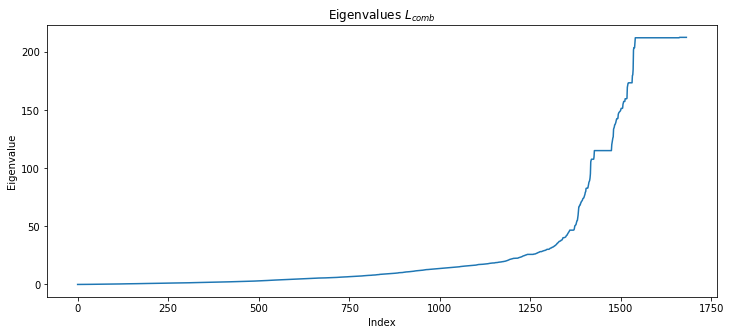

In [136]:
plt.figure(figsize=(12,5))
plt.plot(lamb_comb)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues $L_{comb}$')

### k Nearest-Neighbors

In [137]:
k = 5

In [138]:
np_ml_movies = df_ML_movies.to_numpy()
np_ml_movies

array([[1, 'toy story', '1995', ..., 0, 0, 0],
       [2, 'goldeneye', '1995', ..., 1, 0, 0],
       [3, 'four rooms', '1995', ..., 1, 0, 0],
       ...,
       [1639, 'azucar amargo', '1996', ..., 0, 0, 0],
       [1652, 'feng yue', '1997', ..., 0, 0, 0],
       [1682, 'schrei aus stein', '1996', ..., 0, 0, 0]], dtype=object)

In [139]:
for i in range(adjacency.shape[0]):
    idx = adjacency[i,:].argsort()[-k:]
    idx = [j for j in idx if adjacency[i,j] > 0]
    neighbors = [(np_ml_movies[j,1], adjacency[i,j]) for j in idx]
    print(i,np_ml_movies[i,1],neighbors)

0 toy story [('first kid', 0.12477059832810866), ('beauty and the beast', 0.12648537023883405), ('the next karate kid', 0.1269148633940705), ('the lion king', 0.13525532533308657), ('home alone', 0.14160406371033446)]
1 goldeneye [('desperado', 0.16598500055174645), ('die hard', 0.17169807684373387), ('broken arrow', 0.1719615458857992), ('true lies', 0.17642698833636178), ('tomorrow never dies', 0.3405453090913766)]
2 four rooms [('reservoir dogs', 0.1056986713719224), ('my crazy life (mi vida loca)', 0.10886919764059902), ('pulp fiction', 0.12310172557575678), ('from dusk till dawn', 0.15725339290258844), ('jackie brown', 0.18279774199874466)]
3 get shorty [('the jerky boys', 0.10540925533894598), ('welcome to the dollhouse', 0.10540925533894598), ('wag the dog', 0.10540925533894598), ('salut cousin!', 0.10540925533894598), ('faster pussycat! kill! kill!', 0.12909944487358058)]
4 copycat [('the silence of the lambs', 0.12407291674636625), ('metro', 0.1264560818715471), ('jade', 0.127

638 tin drum, the (blechtrommel, die) [('gabbeh', 1.0), ('aparajito', 1.0), ('three colors: blue', 1.0), ('for ever mozart', 1.0), ('scream of stone (schrei aus stein)', 1.0)]
639 the cook the thief his wife & her lover [('gabbeh', 1.0), ('aparajito', 1.0), ('three colors: blue', 1.0), ('for ever mozart', 1.0), ('scream of stone (schrei aus stein)', 1.0)]
640 paths of glory [('colonel chabert, le', 0.13159033899195383), ('full metal jacket', 0.1386281949792681), ('to cross the rubicon', 0.16116459280507603), ('richard iii', 0.16116459280507603), ('nothing personal', 0.16116459280507603)]
641 the grifters [('fargo', 0.11322770341445959), ('to cross the rubicon', 0.1386750490563073), ('cyclo', 0.1386750490563073), ('killer: a journal of murder', 0.1386750490563073), ('night falls on manhattan', 0.1386750490563073)]
642 the innocent [('mrs. brown (her majesty, mrs. brown)', 0.23249527748763854), ('picture bride', 0.23249527748763854), ("william shakespeare's romeo and juliet", 0.232495277

1137 best men [('killer: a journal of murder', 0.172773685116272), ('hana-bi', 0.2116036847575795), ("c'est arrivé près de chez vous", 0.2116036847575795), ('faster pussycat! kill! kill!', 0.2116036847575795), ('lashou shentan', 0.2116036847575795)]
1138 hackers [('hard eight', 0.11322770341445956), ('u.s. marshalls', 0.11322770341445956), ('albino alligator', 0.11322770341445956), ('purple noon', 0.11322770341445956), ('die xue shuang xiong (killer, the)', 0.11322770341445956)]
1139 the road to wellville [('the unbearable lightness of being', 0.11288881600242863), ('bliss', 0.11516232091612014), ('faces', 0.11585992674767498), ('kicking and screaming', 0.11656441717791415), ('like water for chocolate (como agua para chocolate)', 0.12259965271821029)]
1140 the war room [('carmen miranda: bananas is my business', 0.15811388300841897), ('fire on the mountain', 0.15811388300841897), ('the celluloid closet', 0.15811388300841897), ('when we were kings', 0.15811388300841897), ('a perfect can

1673 mamma roma [('raise the red lantern', 0.1690308509457033), ('symphonie pastorale, la', 0.1690308509457033), ('death in the garden (mort en ce jardin, la)', 0.1690308509457033), ('scream of stone (schrei aus stein)', 0.1690308509457033), ('to cross the rubicon', 0.2390457218668787)]
1674 the sunchaser [('gabbeh', 0.13245323570650439), ('mondo', 0.13245323570650439), ('for ever mozart', 0.13245323570650439), ('symphonie pastorale, la', 0.13245323570650439), ('scream of stone (schrei aus stein)', 0.13245323570650439)]
1675 the war at home [('gabbeh', 0.13245323570650439), ('mondo', 0.13245323570650439), ('for ever mozart', 0.13245323570650439), ('symphonie pastorale, la', 0.13245323570650439), ('scream of stone (schrei aus stein)', 0.13245323570650439)]
1676 sweet nothing [('the turning', 1.0), ('boys life', 1.0), ('drunks', 1.0), ('convent, the (convento, o)', 1.0), ('scream of stone (schrei aus stein)', 1.0)]
1677 mat' i syn [('the turning', 1.0), ('boys life', 1.0), ('drunks', 1.0